<a href="https://colab.research.google.com/github/Tezashree/DataScienceBootcamp/blob/main/Projects/LOAN_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

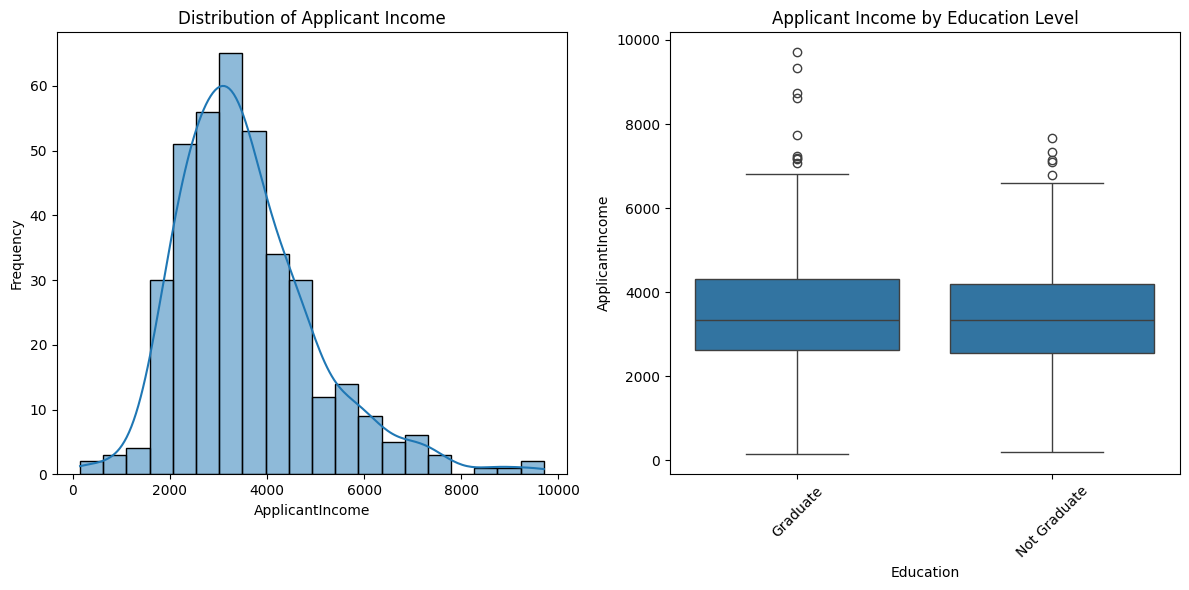

K-Nearest Neighbors (KNN) Metrics:
Accuracy: 0.69
Precision: 0.74
Recall: 0.88
F1-score: 0.80
Decision Tree Metrics:
Accuracy: 0.58
Precision: 0.71
Recall: 0.71
F1-score: 0.71
Random Forest Metrics:
Accuracy: 0.70
Precision: 0.73
Recall: 0.93
F1-score: 0.82


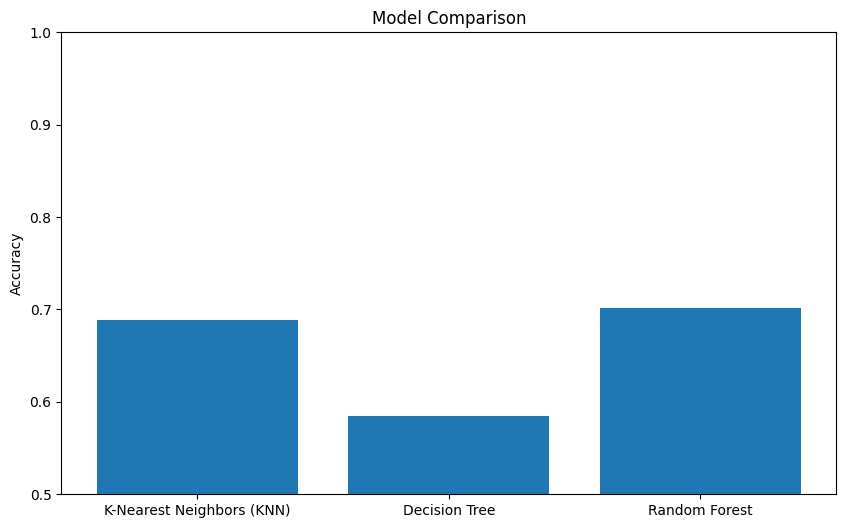

Cross-validated scores: [0.7012987  0.69736842 0.71052632 0.71052632 0.67105263]
Confusion Matrix:
 [[ 4 17]
 [ 6 50]]
Classification Report:
               precision    recall  f1-score   support

           N       0.40      0.19      0.26        21
           Y       0.75      0.89      0.81        56

    accuracy                           0.70        77
   macro avg       0.57      0.54      0.54        77
weighted avg       0.65      0.70      0.66        77



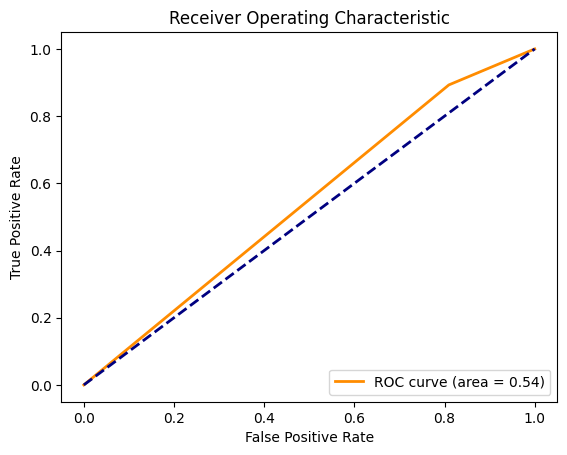

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load data
df = pd.read_csv('loan_data.csv')

# Data analysis plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], bins=20, kde=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')

plt.subplot(1, 2, 2)
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.xlabel('Education')
plt.ylabel('ApplicantIncome')
plt.title('Applicant Income by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data cleaning
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(0, inplace=True)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Data preprocessing
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Train-test split
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert 'Y' and 'N' to 1 and 0
y_test_binary = y_test.replace({'Y': 1, 'N': 0})
y_pred_binary = pd.Series(y_pred).replace({'Y': 1, 'N': 0})

# Models
models = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Y', average='binary')
    recall = recall_score(y_test, y_pred, pos_label='Y', average='binary')
    f1 = f1_score(y_test, y_pred, pos_label='Y', average='binary')

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("="*50)

# Compare accuracies with a bar chart
accuracies = [accuracy_score(y_test, model.predict(X_test_preprocessed)) for model in models.values()]
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies)
plt.ylim(0.5, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# Model Evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

# Cross-validation scores
scores = cross_val_score(model, preprocessor.transform(X), y, cv=5)
print("Cross-validated scores:", scores)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
